In [61]:
# import the libraries we need to make the proposed logos

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
import numpy as np

In [77]:
# set the nmis colour palette and display it (from NMIS sharepoint brand rules page)

nmis_cp_pri = ['#6f7271', '#3e4765']
nmis_cp_sec = ['#00294b', '#368dbc', '#009fe3', '#8ec79a', '#ffcc00', '#ec6608', '#d83569', '#6f3f81']

# create a function to plot the 2 version

def plot_colour_palette(cp):
    plt.rcParams["figure.figsize"] = (20, 2)
    fig, ax = plt.subplots(nrows=1, ncols=len(cp))
    ind = 0
    for row in ax:
        row.scatter(0, 0, s = 6000, color = cp[ind])
        row.set_title(cp[ind])
        ind+=1
        row.axis('off')
    plt.show()

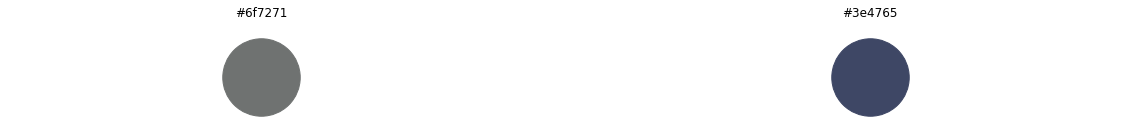

In [78]:
# plot the primary palette

plot_colour_palette(nmis_cp_pri)

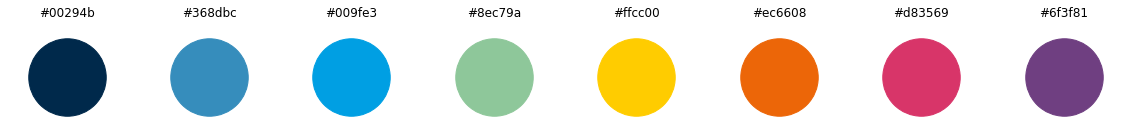

In [79]:
# plot the secondary palette

plot_colour_palette(nmis_cp_sec)

In [80]:
# create function to rotate cartesian coordinates around another set of cartesian coordinates (this becomes clear later)

def rotate(ox, oy, px, py, angle):
    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

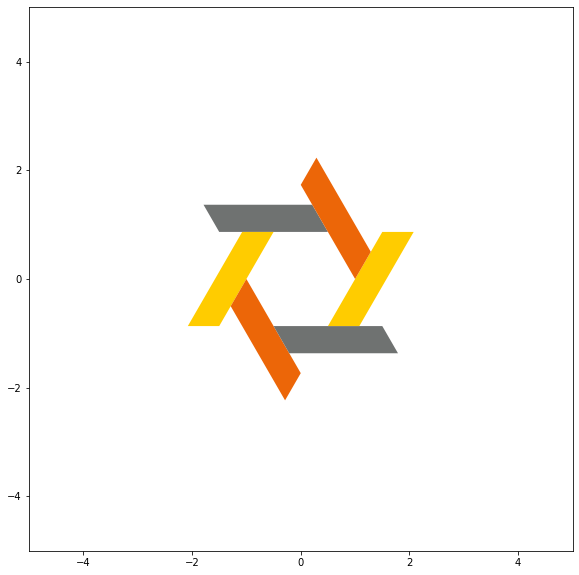

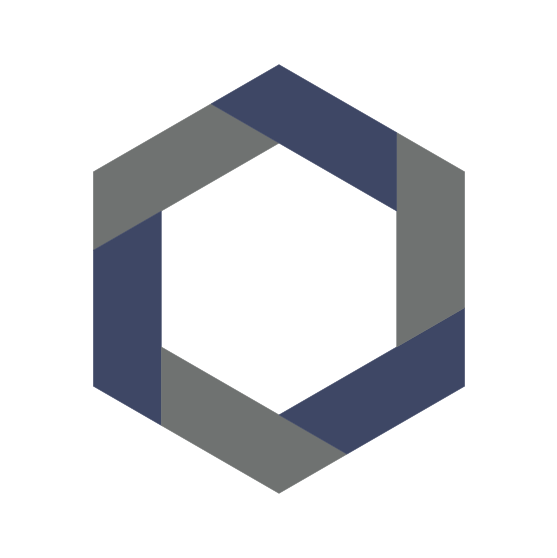

In [91]:
plt.rcParams["figure.figsize"] = (10, 10)
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

# define parallelogram width and length
wd = 0.5
wo = wd*math.tan(math.radians(30))
le = 1+(wo*2)

hex_x = [0, -(math.sqrt(3)/2), -(math.sqrt(3)/2), 0, (math.sqrt(3)/2), (math.sqrt(3)/2)]
hex_y = [1, 0.5, -0.5, -1, -0.5, 0.5]

# define angle list
ang = [30, 90, 150, 210, 270, 330, 0]
#define color list
nmis_cp = ['#6f7271',
           '#3e4765',
           '#6f7271',
           '#3e4765',
           '#6f7271',
           '#3e4765']

for ind in range(len(hex_x)):
    hex_co = ind
    lo = [hex_x[hex_co], hex_y[hex_co]]
    x = [lo[0], lo[0]-le, lo[0]-le+wo, lo[0]-wo]
    y = [lo[1], lo[1], lo[1]+wd, lo[1]+wd]

    for ind_m in range(len(x)):
        qx, qy = rotate(lo[0], lo[1], x[ind_m], y[ind_m], math.radians(ang[ind]))
        x[ind_m] = qx
        y[ind_m] = qy
    ax.fill(x, y, linewidth = 0.5, color = nmis_cp[ind])
    # ax.scatter(hex_x, hex_y, color = "k")

plt.axis('off')
plt.savefig('i4ch-hex-bi.png', transparent=False)
    
# x = [0.3, 0.6, 0.7, 0.4]
# y = [0.4, 0.4, 0.5, 0.5]
# ax.add_patch(patches.Polygon(xy=list(zip(x,y)), fill=False))

In [81]:
# let's test some octagonal based logos (to use full secondary colour palette and keep with numeric theme of nmis)


# set octagon vertices

oct_x = [(math.sqrt(2)/2), 0, -(math.sqrt(2)/2), -1, -(math.sqrt(2)/2), 0, (math.sqrt(2)/2), 1]
oct_y = [(math.sqrt(2)/2), 1, (math.sqrt(2)/2), 0, -(math.sqrt(2)/2), -1, -(math.sqrt(2)/2), 0]

# define parallelogram width and length

wd = 0.3
wo = wd*math.tan(math.radians(45))
le = 1.2

# define angle list
ang = [337.5, 22.5, 67.5, 112.5, 157.5, 202.5, 247.5, 292.5]

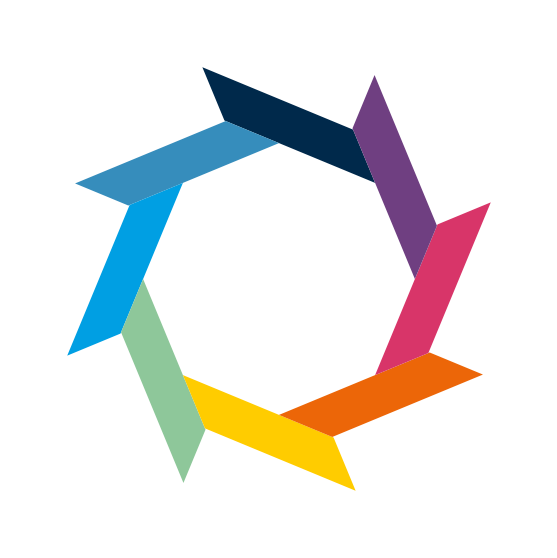

In [83]:
plt.rcParams["figure.figsize"] = (10, 10)
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

s = 280000
bg = nmis_cp[0]
ax.scatter(0, 0, s = s, color = "white")

for ind in range(len(oct_x)):
    oct_co = ind
    lo = [oct_x[oct_co], oct_y[oct_co]]
    x = [lo[0], lo[0]-le, lo[0]-le-wo, lo[0]-wo]
    y = [lo[1], lo[1], lo[1]+wd, lo[1]+wd]

    for ind_m in range(len(x)):
        qx, qy = rotate(lo[0], lo[1], x[ind_m], y[ind_m], math.radians(ang[ind]))
        x[ind_m] = qx
        y[ind_m] = qy
    ax.fill(x, y, linewidth = 0, color = nmis_cp_sec[ind])
  
plt.axis('off')
plt.savefig('i4ch-full.png', transparent=False)

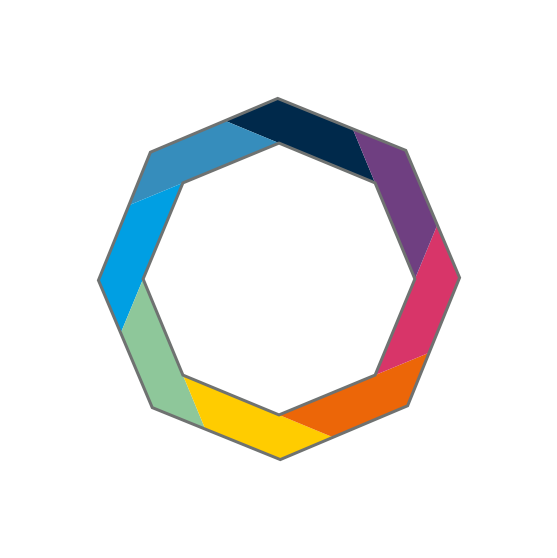

In [90]:
plt.rcParams["figure.figsize"] = (10, 10)
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

s = 280000
bg = nmis_cp[0]
ax.scatter(0, 0, s = s, color = "white")

oct_x_out = []
oct_y_out = []
for ind in range(len(oct_x)):
    oct_co = ind
    lo = [oct_x[oct_co], oct_y[oct_co]]
    x = [lo[0], lo[0]-le, lo[0]-le+wo, lo[0]-wo]
    y = [lo[1], lo[1], lo[1]+wd, lo[1]+wd]

    for ind_m in range(len(x)):
        qx, qy = rotate(lo[0], lo[1], x[ind_m], y[ind_m], math.radians(ang[ind]))
        x[ind_m] = qx
        y[ind_m] = qy
        if ind_m == 2:
            oct_x_out.append(qx)
            oct_y_out.append(qy)
    ax.fill(x, y, linewidth = 0, color = nmis_cp_sec[ind])
    

ax.add_patch(patches.Polygon(xy=list(zip(oct_x, oct_y)), linewidth = 3, color = nmis_cp_pri[0], fill=False))
ax.add_patch(patches.Polygon(xy=list(zip(oct_x_out, oct_y_out)), linewidth = 3, color = nmis_cp_pri[0], fill=False))

plt.axis('off')

plt.savefig('i4ch-full-alt.png', transparent=False)

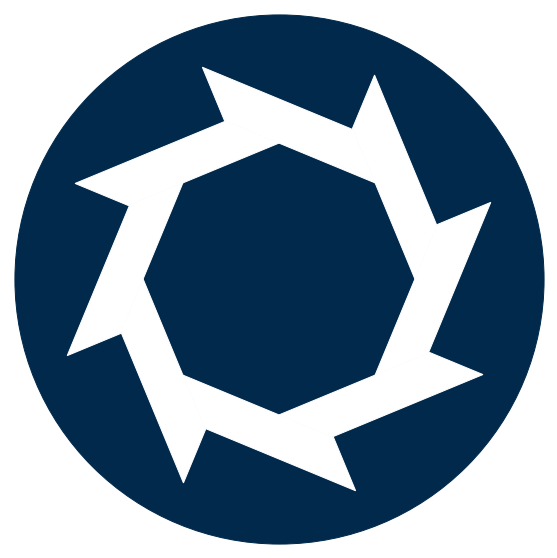

In [85]:
plt.rcParams["figure.figsize"] = (10, 10)
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

 
s = 280000
bg = nmis_cp_sec[0]
ax.scatter(0, 0, s = s, color = bg)

for ind in range(len(oct_x)):
    oct_co = ind
    lo = [oct_x[oct_co], oct_y[oct_co]]
    x = [lo[0], lo[0]-le, lo[0]-le-wo, lo[0]-wo]
    y = [lo[1], lo[1], lo[1]+wd, lo[1]+wd]

    for ind_m in range(len(x)):
        qx, qy = rotate(lo[0], lo[1], x[ind_m], y[ind_m], math.radians(ang[ind]))
        x[ind_m] = qx
        y[ind_m] = qy
    ax.fill(x, y, linewidth = 1, color = "w")

plt.axis('off')
plt.savefig('i4ch-mono.png', transparent=False)

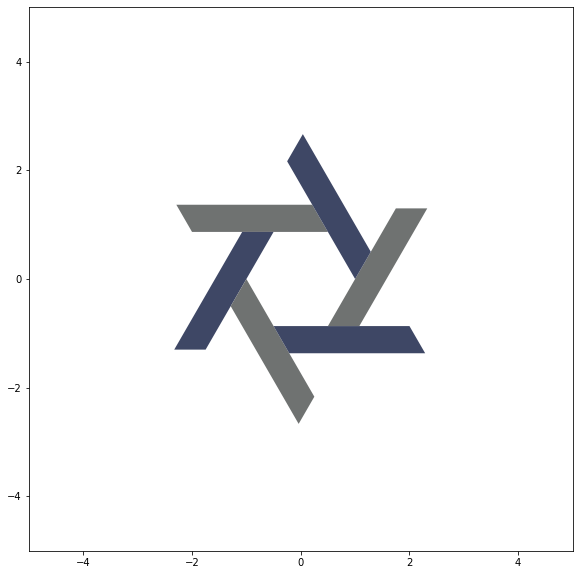

In [94]:
# hex themed logo


plt.rcParams["figure.figsize"] = (10, 10)
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)

# define parallelogram width and length
wd = 0.5
wo = wd*math.tan(math.radians(30))
le = 2.5

hex_x = [0.5, -0.5, -1, -0.5, 0.5, 1]
hex_y = [(math.sqrt(3)/2), (math.sqrt(3)/2), 0, -(math.sqrt(3)/2), -(math.sqrt(3)/2), 0]

# define angle list
ang = [0, 60, 120, 180, 240, 300]

#define color list
nmis_cp = ['#6f7271',
           '#3e4765',
           '#6f7271',
           '#3e4765',
           '#6f7271',
           '#3e4765']

for ind in range(len(hex_x)):
    hex_co = ind
    lo = [hex_x[hex_co], hex_y[hex_co]]
    x = [lo[0], lo[0]-le, lo[0]-le-wo, lo[0]-wo]
    y = [lo[1], lo[1], lo[1]+wd, lo[1]+wd]

    for ind_m in range(len(x)):
        qx, qy = rotate(lo[0], lo[1], x[ind_m], y[ind_m], math.radians(ang[ind]))
        x[ind_m] = qx
        y[ind_m] = qy
    ax.fill(x, y, nmis_cp[ind])
